In [1]:
import torch
import torchvision
from torchvision import transforms,datasets

In [4]:
train = datasets.MNIST("", train = True, download = True,
                      transform = transforms.Compose([transforms.ToTensor()]))


test = datasets.MNIST("", train = False, download = True,
                      transform = transforms.Compose([transforms.ToTensor()]))

9920512it [00:02, 3793543.33it/s]                                                                                      


Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw


32768it [00:00, 110436.11it/s]                                                                                         


Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw


1654784it [00:01, 1553388.14it/s]                                                                                      


Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw


8192it [00:00, 42666.69it/s]                                                                                           


Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw
Processing...
Done!


In [8]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [20]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [17]:
dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
total = 0
for data in trainset:
    xs,ys = data
    for y in ys:
        dict[int(y)] +=1
        total +=1
print(dict)
    

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [18]:
for i in dict:
    print(f"{i}: {dict[i]/total * 100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


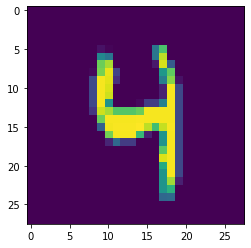

In [21]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0]. view(28,28))
plt.show()

In [22]:
import torch.nn as nn
import torch.nn.functional as F

In [32]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim = 1)
        
        
net = Net()
        

In [35]:
X = torch.rand((28*28))
X= X.view(-1,28*28)

In [36]:
output = net(X)

In [37]:
output

tensor([[-2.2941, -2.2726, -2.2950, -2.3296, -2.3558, -2.2834, -2.2649, -2.4289,
         -2.1848, -2.3353]], grad_fn=<LogSoftmaxBackward>)